# Assignment 1 (10 points)
(due on Oct. 15, 23:59pm)

In the first assignment, we create our own **CIFAR-10** dataset with only 500 samples (in particular 50 samples per class). The assignment is split into 3 sub-tasks, see below:

In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST, CIFAR10
import torchvision.transforms as transforms
from torch.utils.data.dataset import Subset

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn

from sklearn.model_selection import StratifiedShuffleSplit

torch.manual_seed(1234);
np.random.seed(1234);


First, we download the *training* split of CIFAR-10, and collect all labels.

In [2]:
ds_train = CIFAR10('/tmp/cifar', 
                 train=True, 
                 transform=transforms.ToTensor(), 
                 target_transform=None, 
                 download=True)
lab = [ds_train[x][1] for x in range(len(ds_train))]

Files already downloaded and verified


In [3]:
classes = ['plane', 
           'car', 
           'bird', 
           'cat',
           'deer', 
           'dog', 
           'frog', 
           'horse', 
           'ship', 
           'truck']

This dataset contains natural images. We have a total of 50,000 images available. Elements from the dataset `ds_train` are tuple of the form (image, label). We can access, e.g., the first image via

In [4]:
img = ds_train[0][0] # first image in the dataset (a tensor)

... and its label via

In [5]:
img_lab = ds_train[0][1] # label of the first image in the dataset
print('{} ({})'.format(img_lab, classes[img_lab]))

6 (frog)


### Task 1
Each (image, label) tupel in the CIFAR-10 training dataset has an index, e.g., `ds_train[100]`. Create 10 different lists of 500 indices such that the labels corresponding to these indices are balanced, that is, label 0 occurs 50 times, label 1 50 times, etc. 

**Hint**: use `sklearn.model_selection.StratifiedShuffleSplit`

In [6]:
def generate_train_indices(lab, n_splits=10, train_size=500):
    sss = StratifiedShuffleSplit(n_splits, train_size)
    X = np.zeros(len(lab))
    y = lab
    return [train_index[1] for train_index in sss.split(X, y)]
    
# test your code with
train_indices = generate_train_indices(lab, 10, 500)

assert type(train_indices) == list
assert len(train_indices) == 10
for ti in train_indices:
    assert len(ti) == 500


### Task 2
Use one of these lists to then create a version of the CIFAR-10 dataset with exactly 500 samples, e.g., stored in
variable `ds_train_subset`.

**Hint**: use `torch.utils.data.dataset.Subset`

In [14]:
ds_train_subset = torch.utils.data.Subset(ds_train, train_indices[1])

You can also easily check if the labels are balanced via:

In [15]:
from collections import Counter
print(Counter([ds_train_subset[i][1] for i in range(len(ds_train_subset))]))

Counter({5: 50, 0: 50, 2: 50, 7: 50, 9: 50, 3: 50, 8: 50, 6: 50, 1: 50, 4: 50})


### Task 3
Write a method that allows you to visualize a selection of images from your dataset.

In [71]:
def show_images(ds: torchvision.datasets.cifar.CIFAR10, 
                indices: list):
    assert len(indices) == 3
    assert np.max(indices) < len(ds)
    
    plt.imshow(  ds[indices[0]][0].permute(1, 2, 0)  )
    plt.imshow(  ds[indices[1]][0].permute(1, 2, 0)  )
    plt.imshow(  ds[indices[2]][0].permute(1, 2, 0)  )

SyntaxError: invalid syntax (<ipython-input-71-012dd852d501>, line 8)

Test your code with, e.g.:

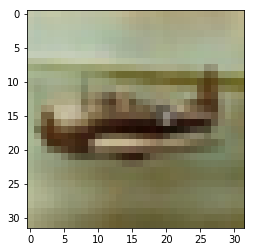

In [70]:
show_images(ds_train_subset,[1,2,498])